# Laboratorio 04 - Regresión Logística

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Regression as reg

## Task 0 - Probando mi función sigmoide

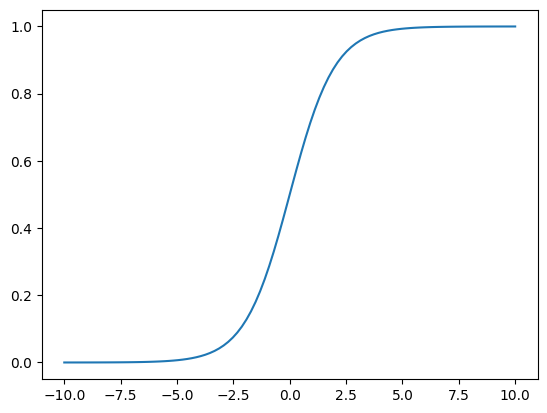

In [2]:
x = np.linspace(-10, 10, 100).reshape(100, 1)
y = reg.sigmoid([[1]], x)
plt.plot(x, y)
plt.show()

## Task 1.1 - Cargar CSV

In [3]:
# Columns
# 0: Sex
# 1: Age
# 2: Cigs per day
# 3: BGMeds
# 4: Prevalent Hyp
# 5: Diabetes
# 6: Tot Chol
# 7: Sys BP
# 8: Dia BP
# 9: Glucose
# 10: Ten Year CHD

clean_data = np.genfromtxt('data.csv', delimiter=',',usecols=(0,1,4,5,7,8,9,10,11,14,15), skip_header=True)
mean = np.nanmean(clean_data, axis=0)	# Calculate mean of each column
nan_indices = np.where(np.isnan(clean_data))
clean_data[nan_indices] = 0

In [4]:
np.random.seed(13)
np.random.shuffle(clean_data)

## Task 2.2 - Ajustar un modelo logistico plinomial

### Modelo simple sin ninguna feature polinomial

In [5]:
data = clean_data.copy()
for i in range(data.shape[1] - 1):
    data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:, i])
train_data = data[:int(0.6*len(data))]
test_data = data[int(0.6*len(data)):]

X = train_data[:, :-1]
y = train_data[:, -1].reshape(train_data.shape[0], 1)
theta = np.ones((X.shape[1], 1))
theta = reg.linear_regression(X, y, theta, 0.03, 0.03)
# Predict the test data
X_test = test_data[:, :-1]
y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
y_pred = reg.sigmoid(theta, X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
# Accuracy and precision
print("Accuracy: ", np.sum(y_pred == y_test) / len(y_test))
print("Precision: ", np.sum(y_pred[y_pred == 1] == y_test[y_pred == 1]) / np.sum(y_pred == 1))

Accuracy:  0.6185141509433962
Precision:  0.22611036339165544


### Modelo con una feature polinomial (Sys Bp) k = 2

In [6]:
new_data = clean_data.copy()
# Add polynomial feature: Sys BP
new_data = np.hstack((new_data[:, 7].reshape(new_data.shape[0], 1)**2, new_data))
# Normalize the data except
for i in range(new_data.shape[1] - 1):
    new_data[:, i] = (new_data[:, i] - np.mean(new_data[:, i])) / np.std(new_data[:, i])

# Bias
new_data = np.hstack((np.ones((new_data.shape[0], 1)), new_data))
train_data = new_data[:int(0.4*len(new_data))]
cv_data = new_data[int(0.4*len(new_data)):int(0.6*len(new_data))]
test_data = new_data[int(0.6*len(new_data)):]

# Train the model
X = train_data[:, :-1]
y = train_data[:, -1].reshape(train_data.shape[0], 1)
theta = np.ones((X.shape[1], 1))
theta = reg.linear_regression(X, y, theta, 0.01, 0.01)
# Predict the test data
X_test = test_data[:, :-1]
y_test = test_data[:, -1].reshape(test_data.shape[0], 1)

y_pred = reg.sigmoid(theta, X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
# Accuracy and precision
print("Accuracy: ", np.sum(y_pred == y_test) / len(y_test))
print("Precision: ", np.sum(y_pred[y_pred == 1] == y_test[y_pred == 1]) / np.sum(y_pred == 1))


Accuracy:  0.8372641509433962
Precision:  0.3656716417910448


Si hay mejoras, intentamos con mas k para encontrar si existe un mejor modelo. Usamos cross validation

### Modelo con cross validation (Sys Bp)

1
2
3
4
5


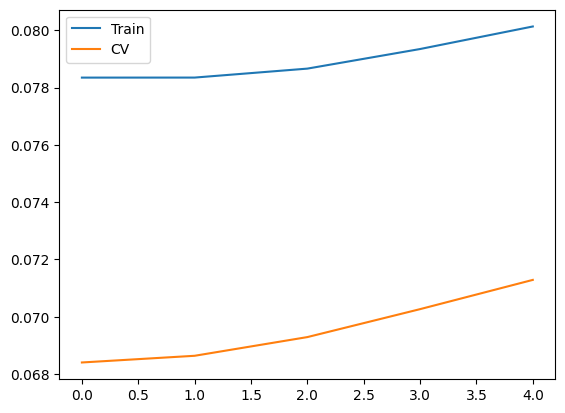

Accuracy:  0.8113207547169812
Precision:  0.31


In [9]:
new_data = clean_data.copy()
# Add polynomial feature: Sys BP

train_losses = []
cv_losses = []
best_theta = None
for k in range(1,6):
		print(k)
		data = clean_data
		# Add polynomial feature: Sys BP
		data = np.hstack((new_data[:, 7].reshape(new_data.shape[0], 1) ** k, data))
	
		# Normalize the data except last column
		for i in range(data.shape[1] - 1):
				data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:, i])
		# Bias
		data = np.hstack((np.ones((data.shape[0], 1)), data))
		train_data = data[:int(0.6*len(data))]
		cv_data = data[int(0.6*len(data)):int(0.8*len(data))]
		# Train model
		X = train_data[:, :-1]
		y = train_data[:, -1].reshape(train_data.shape[0], 1)
		theta = np.ones((X.shape[1], 1))
		theta = reg.linear_regression(X, y, theta, 0.05, 0.02)
		# Add loss to train_losses
		train_losses.append(reg.loss(X, y, theta))
		# Calculate loss on cv_data
		X_cv = cv_data[:, :-1]
		y_cv = cv_data[:, -1].reshape(cv_data.shape[0], 1)
		cv_losses.append(reg.loss(X_cv, y_cv, theta))
		if k == 2:
			best_theta = theta
# Plot the losses
plt.plot(train_losses, label="Train")
plt.plot(cv_losses, label="CV")
plt.legend()
plt.show()	
# Predict with best_theta
test_data = data[int(0.8*len(data)):]
X_test = test_data[:, :-1]
y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
y_pred = reg.sigmoid(best_theta, X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
# Accuracy and precision
print("Accuracy: ", np.sum(y_pred == y_test) / len(y_test))
print("Precision: ", np.sum(y_pred[y_pred == 1] == y_test[y_pred == 1]) / np.sum(y_pred == 1))

## Task 2.3 - Análisis de resultados

El modelo con únicamente una feature polinomial no mostró ser tan bueno para generalizar los datos del set de prueba. El segundo modelo tuvo un mejor resultado para accuracy y presición. Esto lo confirmamos con cross validation donde se puede observar que con k = 2 se reduce tanto el error de test como el error de cross validation. Sin embargo puede ser que una regresión logística no sea el mejor algoritmo para clasificar este dataset debido a la precisión que es únicamente de un 32%.